# Paso 0. Introducción y objetivos

El presente trabajo corresponde a la unidad nro 8 del curso de Data Analytics de TripleTen, denominada "Análisis del negocio". <br> El trabajo consta en la simulación de una situación real en la que se hace un informe y métricas de visitas, ventas y marketing para una web de ventas. <br> Finalizaremos con una conclusión y recomendaciones acerca de cuánto y dónde invertir.

# Paso 1. Importación de Librerías y Carga de Datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from math import factorial
from scipy import stats as st

In [2]:
# visits = pd.read_csv('/Users/Juan/Documents/DataAnalytics/DA_S08_BusinessAnalytics/DA_S08_Project/visits_log_us.csv', sep=',')
# orders = pd.read_csv('/Users/Juan/Documents/DataAnalytics/DA_S08_BusinessAnalytics/DA_S08_Project/orders_log_us.csv', sep=',')
# costs = pd.read_csv('/Users/Juan/Documents/DataAnalytics/DA_S08_BusinessAnalytics/DA_S08_Project/costs_us.csv', sep=',')

visits = pd.read_csv('visits_log_us.csv', sep=',')
orders = pd.read_csv('orders_log_us.csv', sep=',')
costs = pd.read_csv('costs_us.csv', sep=',')

# Paso 2. Preparación de Datos

## 2.0  Plan de Trabajo

1) Revisión, evaluación y tratamiento de nombres de campos
2) Revisión, evaluación y tratamiento de tipos de datos. Descripción de cambios realizados en los tipos de datos
3) Revisión, evaluación y tratamiento de valores ausentes
4) Revisión, evaluación y tratamiento de valores duplicados
5) Contenido y descripción de los datasets
6) Conclusiones

## 2.1 Revisión, evaluación y tratamiento de nombres de campos

### 2.1.1 Dataset VISITS

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
#Corrección de  nombres de campos
visits.columns = visits.columns.str.lower()
visits.columns = visits.columns.str.replace(' ', '_')
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   device     359400 non-null  object
 1   end_ts     359400 non-null  object
 2   source_id  359400 non-null  int64 
 3   start_ts   359400 non-null  object
 4   uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


### 2.1.2 Dataset ORDERS

In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [6]:
#Corrección de  nombres de campos
orders.columns = orders.columns.str.lower()
orders.columns = orders.columns.str.replace(' ', '_')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy_ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


### 2.1.3 Dataset COSTS

In [7]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Conclusión: se corrigen nombres de los campos para los datasets VISITS y ORDERS.

## 2.2 Revisión, evaluación y tratamiento de tipos de datos

In [8]:
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   device     359400 non-null  object
 1   end_ts     359400 non-null  object
 2   source_id  359400 non-null  int64 
 3   start_ts   359400 non-null  object
 4   uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [9]:
#Corrección de tipos de dato
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [10]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy_ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [11]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [12]:
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [13]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Conclusión: para los tres datasets, se corrigen los tipos de datos para los campos de tipo "fecha".

## 2.3 Revisión, evaluación y tratamiento de valores ausentes

In [14]:
visits.isna().sum()

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64

In [15]:
orders.isna().sum()

buy_ts     0
revenue    0
uid        0
dtype: int64

In [16]:
costs.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

Conclusión: no se observan valores ausentes.

## 2.4 Revisión, evaluación y tratamiento de valores duplicados

### 2.4.1 Dataset VISITS

## 2.5 Contenido y descripción de los datasets

### 2.5.1 Datasets VISITS

In [17]:
visits.describe()

,end_ts,source_id,start_ts,uid
count,359400,359400.000000,359400,3.594000e+05
mean,2017-12-18 06:28:15.036205056,3.750515,2017-12-18 06:17:32.010517760,9.202557e+18
min,2017-06-01 00:02:00,1.000000,2017-06-01 00:01:00,1.186350e+13
25%,2017-10-15 09:45:45,3.000000,2017-10-15 09:41:00,4.613407e+18
50%,2017-12-18 18:59:30,4.000000,2017-12-18 18:46:00,9.227413e+18
75%,2018-02-28 10:08:15,5.000000,2018-02-28 09:54:00,1.372824e+19
max,2018-06-01 01:26:00,10.000000,2018-05-31 23:59:00,1.844668e+19
std,NaN,1.917116,NaN,5.298433e+18


In [18]:
visits['device'].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
359395    False
359396    False
359397    False
359398    False
359399    False
Name: device, Length: 359400, dtype: bool

### 2.5.2 Dataset ORDERS

### 2.5.3 Dataset COSTS

## 2.6 Conclusiones

* Dataset "COMPANY":
    * Es un extracto de datos madre para las fechas específicas del 15 y 16 de Noviembre de 2017, y con la función agregada de sumar todos los viajes realizados agrupados por empresa.
    * No presenta errores en los NOMBRES DE CAMPOS
    * No presenta errores en los TIPOS DE DATOS
    * No presenta VALORES AUSENTES
    * No presenta VALORES DUPLICADOS
* Dataset "LOCATION":
    * Es un extracto de datos madre para el período específico de Noviembre 2017, con la función agregada de promedio de viajes agrupados por locación de destino.
    * No presenta errores en los NOMBRES DE CAMPOS
    * No presenta errores en los TIPOS DE DATOS
    * No presenta VALORES AUSENTES
    * No presenta VALORES DUPLICADOS
    
Para estos dos primeros datasets,considero que es importante destacar que son extractos de una tabla principal de registros, y que además de agrupados están filtrados por fechas específicas. Si bien ambos datasets proveen información, resulta bastante acotada pues no puede evaluarse estacionalidad o días de semana, o cantidad de pasajeros, ni locación de origen.

* Dataset "AIRPORT_TRIPS":
    * Es un extracto de registros de viajes, filtrados para los días Sábado entre 04nov2017 y 25nov2017. Cada viaje muestra su duración expresada en segundos, y' está clasificado como "good" o "bad" de acuerdo a las condiciones meteorológicas que tuvo.
    * No presenta errores en los NOMBRES DE CAMPOS
    * En los TIPOS DE DATOS, se actualiza el formato "fecha" del campo "start_ts"
    * No presenta VALORES AUSENTES
    * Presenta un total de 197 VALORES DUPLICADOS, los cuales se han eliminado


# Paso 3. Análisis de Datos

## 3.1 Análisis de VISITAS

In [19]:
visits.describe()

,end_ts,source_id,start_ts,uid
count,359400,359400.000000,359400,3.594000e+05
mean,2017-12-18 06:28:15.036205056,3.750515,2017-12-18 06:17:32.010517760,9.202557e+18
min,2017-06-01 00:02:00,1.000000,2017-06-01 00:01:00,1.186350e+13
25%,2017-10-15 09:45:45,3.000000,2017-10-15 09:41:00,4.613407e+18
50%,2017-12-18 18:59:30,4.000000,2017-12-18 18:46:00,9.227413e+18
75%,2018-02-28 10:08:15,5.000000,2018-02-28 09:54:00,1.372824e+19
max,2018-06-01 01:26:00,10.000000,2018-05-31 23:59:00,1.844668e+19
std,NaN,1.917116,NaN,5.298433e+18


In [20]:
visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


array([[<Axes: title={'center': 'end_ts'}>,
        <Axes: title={'center': 'source_id'}>],
       [<Axes: title={'center': 'start_ts'}>,
        <Axes: title={'center': 'uid'}>]], dtype=object)

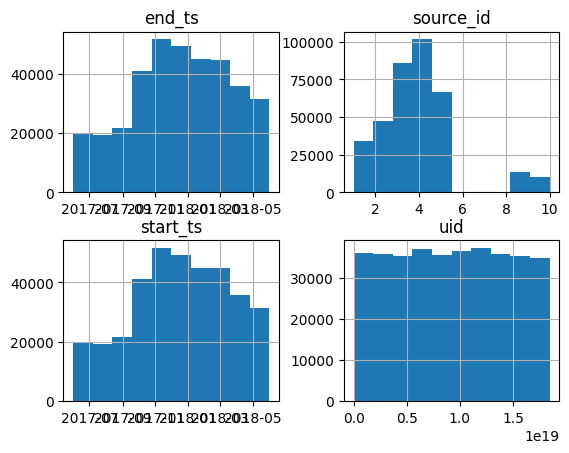

In [21]:
visits.hist(bins=10)

# Paso 5. Conclusiones

Veremos a continuación un resumen de los pasos que se han seguido en este trabajo:

* Paso0: breve desceripción y objetivos del trabajo
* Paso1: importación de librerías adecuadas y carga de los tres datasets a trabajar
* Paso2: EDA o Exploratory Data Analysis. Se chequean los nombres de los campos, se analizan los tipos de datos, datos nulos y/o ausentes, así xomo los duplicados. Se plantea este paso para chequear los datos en crudo y prepararlos de ser necesario para los pasos siguientes pasos de análisis. 
* Paso3: Se hace un análisis de los datos, detallando sus principales observaciones. Se han revisado las compañías y locaciones más populares mediante gráficos de barras horizontales. Luego, se ha utilizado histogramas y boxplots para evaluar la distribución de valores de ambos datasets

* Top Tens de empresas de taxis y ubicaciones:
Según el gráfico de barras, las empresas de taxis "Flash Cab" y "Taxi Affiliation Services" son las dos principales en términos de cantidad de viajes para el período específico de los días 15 y 16 de noviembre de 2017.
En cuanto a las ubicaciones, los 10 principales barrios en términos de cantidad promedio de viajes son visualizados en el segundo gráfico de barras. Estos podrían ser áreas con alta demanda de servicios de taxi durante el período considerado.

* Histogramas:
Los histogramas muestran la distribución de la cantidad total de viajes para los días 15 y 16 de noviembre de 2017, así como la distribución de la cantidad promedio de viajes para todo noviembre de 2017. Ambas distribuciones pueden proporcionar información útil sobre la variabilidad en la cantidad de viajes.

* Boxplots:
Los boxplots muestran la distribución de la cantidad total de viajes y la cantidad promedio de viajes. Pueden ayudar a identificar valores atípicos y proporcionar una comprensión visual de la dispersión de los datos.

* Paso4: Ensayo de hipótesis:
Se planteó la hipótesis de que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.
El análisis de t-test mostró que hay evidencia suficiente para rechazar la hipótesis nula, lo que sugiere que las duraciones promedio de los viajes podrían ser diferentes los sábados lluviosos en comparación con otros días.